In [2]:
import numpy as np
import pprint
import scipy as sp
from scipy.linalg import lu
import matplotlib.pyplot as plt
import math

# 1. 연습문제 3.2

In [3]:
def clgs(A):
    m,n = np.shape(A)
    V = A.copy()
    Q = np.eye(m,n)
    R = np.zeros((n,n))
    
    for j in range(n):
        for i in range(j):
            R[i,j] = np.dot(Q[:,i].T , A[:,j])
            V[:,j] = V[:,j] - R[i,j]*Q[:,i]
        R[j,j] = np.linalg.norm(V[:,j])
        Q[:,j] = V[:,j] / R[j,j]
    return Q,R
        
A = np.array([ [1,4,2,3],[3,6,15,7], [-2,4,3,5],[1,9,7,2], [5,-2,6,3]])
A = A.astype(float)
Q,R = clgs(A)
print("A\n", A)
print("Q\n", Q)
print("R\n", R)



A
 [[ 1.  4.  2.  3.]
 [ 3.  6. 15.  7.]
 [-2.  4.  3.  5.]
 [ 1.  9.  7.  2.]
 [ 5. -2.  6.  3.]]
Q
 [[ 0.15811388  0.3012953  -0.48036149  0.57808607]
 [ 0.47434165  0.41197521  0.66482245 -0.15627223]
 [-0.31622777  0.38123079  0.3871406   0.64055133]
 [ 0.15811388  0.71122089 -0.41616819 -0.36895563]
 [ 0.79056942 -0.29719605 -0.0647313   0.30815778]]
R
 [[ 6.32455532  2.05548048 12.33288287  4.90153037]
 [ 0.         12.19733577 11.12128111  6.22472   ]
 [ 0.          0.          6.87147047  4.12184541]
 [ 0.          0.          0.          4.02967137]]


In [4]:
def mgs(A):
    m,n = np.shape(A)
    Q = A.copy()
    R = np.zeros((n,n))
    for i in range(n-1):
        R[i,i] = np.linalg.norm(Q[:,i])
        Q[:,i] = Q[:,i] / R[i,i]
        R[i, i+1:n+1] = np.dot(Q[:,i].T, Q[:, i+1:n+1])
        Q[:, i+1:n+1] = Q[:,i+1:n+1] - np.dot(Q[:,i][:,None],R[i,i+1:n+1][None,:])
    R[n-1,n-1] = np.linalg.norm(Q[:,n-1])
    Q[:,n-1] = Q[:,n-1] / R[n-1,n-1]
    
    return Q,R
A = np.array([ [1,4,2,3],[3,6,15,7], [-2,4,3,5],[1,9,7,2], [5,-2,6,3]])
A = A.astype(float)
Q,R = mgs(A)
print("A\n", A)
print("Q\n", Q)
print("R\n", R)


A
 [[ 1.  4.  2.  3.]
 [ 3.  6. 15.  7.]
 [-2.  4.  3.  5.]
 [ 1.  9.  7.  2.]
 [ 5. -2.  6.  3.]]
Q
 [[ 0.15811388  0.3012953  -0.48036149  0.57808607]
 [ 0.47434165  0.41197521  0.66482245 -0.15627223]
 [-0.31622777  0.38123079  0.3871406   0.64055133]
 [ 0.15811388  0.71122089 -0.41616819 -0.36895563]
 [ 0.79056942 -0.29719605 -0.0647313   0.30815778]]
R
 [[ 6.32455532  2.05548048 12.33288287  4.90153037]
 [ 0.         12.19733577 11.12128111  6.22472   ]
 [ 0.          0.          6.87147047  4.12184541]
 [ 0.          0.          0.          4.02967137]]


In [5]:
def qrhouse(A):
    m,n = np.shape(A)
    R = A.copy()
    V = np.zeros((m,n))
    for k in range(min(m-1,n)):
        x = R[k:m,k][:,None]
        v = x + np.sign(x[0]) * np.linalg.norm(x) * np.eye(len(x),1)
        V[k:m,k][:,None] = v
        R[k:m, k:n] = R[k:m, k:n] - 2*v*np.dot(v.T, R[k:m,k:n]) / np.dot(v.T,v)
    R[:n,:n] = np.triu(R[:n,:n])
    R[n:m,:] = 0
    return V,R

In [6]:
def formQ(V):
    m,n = V.shape
    Q = np.eye(m)
    for j in reversed(range(min(m-1,n))):
        v = V[:,j][:,None]
        Q = Q - np.dot(2*v, np.dot(v.T,Q) / np.dot(v.T,v))
    return Q


A = np.array([ [1,4,2,3],[3,6,15,7], [-2,4,3,5],[1,9,7,2], [5,-2,6,3]])
A = A.astype(float)
V,R = qrhouse(A)
print("A\n", A)
print("V\n", V)
print("R\n", R)
Q = formQ(V)
print("Q\n",Q)
print(np.dot(Q,R))

A
 [[ 1.  4.  2.  3.]
 [ 3.  6. 15.  7.]
 [-2.  4.  3.  5.]
 [ 1.  9.  7.  2.]
 [ 5. -2.  6.  3.]]
V
 [[ 7.32455532  0.          0.          0.        ]
 [ 3.         15.71712494  0.          0.        ]
 [-2.          5.65347389 -7.24206224  0.        ]
 [ 1.          8.17326306 -5.4877048  -7.88046271]
 [ 5.         -6.13368472  4.11884257  1.1872899 ]]
R
 [[ -6.32455532  -2.05548048 -12.33288287  -4.90153037]
 [  0.         -12.19733577 -11.12128111  -6.22472   ]
 [  0.           0.           6.87147047   4.12184541]
 [  0.           0.           0.           4.02967137]
 [  0.           0.           0.           0.        ]]
Q
 [[-0.15811388 -0.3012953  -0.48036149  0.57808607 -0.56505794]
 [-0.47434165 -0.41197521  0.66482245 -0.15627223 -0.37264799]
 [ 0.31622777 -0.38123079  0.3871406   0.64055133  0.44099799]
 [-0.15811388 -0.71122089 -0.41616819 -0.36895563  0.39980073]
 [-0.79056942  0.29719605 -0.0647313   0.30815778  0.43303943]]
[[ 1.  4.  2.  3.]
 [ 3.  6. 15.  7.]
 [-2. 

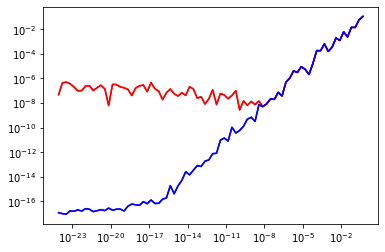

In [7]:
U, _ = np.linalg.qr(np.random.randn(80,80))
V, _ = np.linalg.qr(np.random.randn(80,80))

S = np.diag((1/2)**(1+np.arange(80)))

A = np.dot(np.dot(U,S),V)
Qc, Rc = clgs(A)
Qm, Rm = mgs(A)

plt.semilogx(np.diag(S), np.diag(Rc),'r')

plt.semilogy(np.diag(S), np.diag(Rc),'r')
plt.semilogx(np.diag(S), np.diag(Rm),'b')

plt.semilogy(np.diag(S), np.diag(Rm),'b')

# As seen in the figure, modified(blue) is more stable than classical(red).

In [8]:
A = np.array([[.70000,.70711], [.70001,.70711]])

Qm, Rm = mgs(A)
V, R = qrhouse(A)
Q = formQ(V)
print(np.linalg.norm(np.dot(Q.T, Q) - np.eye(2)))
print(np.linalg.norm(np.dot(Qm.T, Qm) - np.eye(2)))

# householder is more numerically stable than modified gram-schmidt


5.787252299533512e-16
3.254726094493924e-11


# 2. 연습문제 3.3

In [9]:
def givens(A):
    m,n = A.shape
    R = np.copy(A)
    Q = np.identity(m)
    
    l = []
    for x in range(m):
        for y in range(n):
            if x>y:
                l.append((x,y))
                
    for (row, col) in l:
        if R[row, col] != 0:
            x1, x2 = R[col,col], R[row,col]
            
            c = x1 / math.sqrt(x1*x1 + x2*x2)
            s = - x2 / math.sqrt(x1*x1 + x2*x2)
            
            G = np.identity(m)
       
            G[col,col] = c
            G[row,row] = c
            G[row, col] = s
            G[col, row] = -s

            R = np.dot(G, R)
            Q = np.dot(Q, G.T)

    return (Q, R)

In [10]:
A = np.array(np.random.rand(6,3))
print("A\n", A)
Q, R = givens(A)
print("Q\n", Q)
print("R\n", R)
print("Q*R\n",np.dot(Q,R))

print("\nQR decomposition built-in code")
ans1, ans2 = np.linalg.qr(A)
print("Q\n", ans1)
print("R\n", ans2)
print("Q*R\n", np.dot(Q,R))

A
 [[0.78086383 0.05906377 0.71018629]
 [0.3933012  0.26264506 0.18471728]
 [0.69387161 0.54299176 0.16486464]
 [0.91129246 0.27041576 0.90612132]
 [0.19940638 0.03121209 0.28929229]
 [0.64267894 0.35060378 0.33031108]]
Q
 [[ 0.49100786 -0.61663929 -0.57809165  0.05717335  0.125121   -0.15985389]
 [ 0.24730813  0.2616509   0.06478933  0.91401207 -0.02166729 -0.17404681]
 [ 0.43630707  0.65725787 -0.21967552 -0.36641976  0.14753772 -0.41636532]
 [ 0.57302149 -0.22457584  0.64851703 -0.16446792 -0.40561903 -0.09519054]
 [ 0.1253869  -0.11783881  0.41339968  0.          0.89307395  0.04372365]
 [ 0.40411708  0.23449221 -0.14792372  0.          0.          0.87167733]]
R
 [[ 1.59032860e+00  6.31418782e-01  1.15530554e+00]
 [-2.24087535e-17  4.06992894e-01 -4.41366184e-01]
 [ 3.41637730e-17 -4.68926204e-18  2.23565816e-01]
 [-2.04171763e-17 -3.73427653e-18 -3.99004828e-18]
 [-4.90784802e-17 -2.16441801e-18  1.48767509e-18]
 [ 9.65746135e-18 -1.74674409e-18  4.62982086e-18]]
Q*R
 [[0.7808638

# 3. 연습문제 4.3

In [11]:
def mkRandMat(m):
    A = np.random.randn(m,m)/np.sqrt(m)
    return A

def plotEigenVal(size,n):
    A = mkRandMat(size)
    val, vec = np.linalg.eig(A)

    real = np.empty(0)
    img = np.empty(0)
    eig = np.empty(0)
    norm = np.empty(0)
    condnum = np.empty(0)
    for i in range(n):
        A = mkRandMat(size)
        val,vec = np.linalg.eig(A)
        real = np.concatenate((real,val.real), axis=None)
        img = np.concatenate((img,val.imag), axis=None)
        eig = np.concatenate((eig,max(abs(val))), axis=None)
        norm = np.concatenate((norm, np.array([np.linalg.norm(A,ord=2,axis=(0,1))])))

    plt.figure(figsize = (5,5))
    plt.subplot(111)
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    plt.scatter(real,img)
    print("spectral radius : " , np.average(eig), "2-norm : ", np.average(norm) )

spectral radius :  1.047852487998284 2-norm :  1.735525324298644
spectral radius :  1.0640889813853551 2-norm :  1.847169932577717
spectral radius :  1.060504253856734 2-norm :  1.9101074887202696
spectral radius :  1.0549266746367396 2-norm :  1.9478765126381148
spectral radius :  1.045050259460271 2-norm :  1.9662617967616094


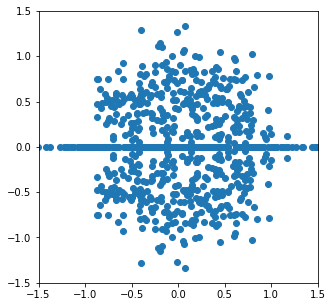

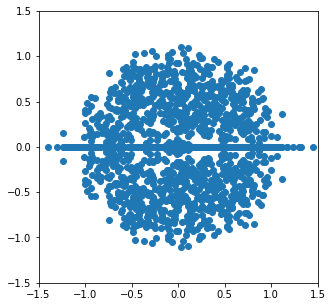

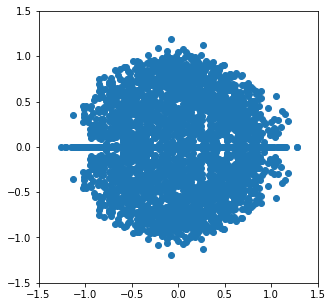

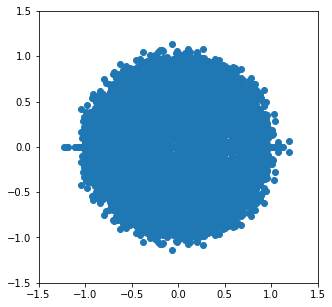

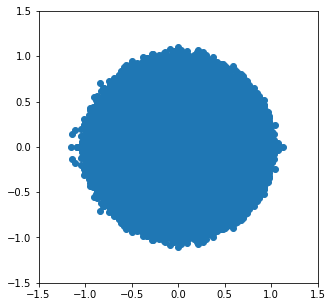

In [12]:
# (a)

plotEigenVal(8,100)
plotEigenVal(16,100)
plotEigenVal(32,100)
plotEigenVal(64,100)
plotEigenVal(128,100)

# m이 커짐에 따라 eigenvalue의 값(실수부, 허수부) 이 단위원에 가까워 지는 것을 알 수 있다.
# spectral radius의 경우, 1보다 약간 큰 값을 보인다.

# (b) 2-norm 의 경우 spectral radius보다 크고 1.7과 2 사이에 분포함을 확인하였다.

8 : {0.00390625: 0.05, 0.0078125: 0.07, 0.015625: 0.08, 0.03125: 0.24, 0.0625: 0.48, 0.125: 0.79}
16 : {0.00390625: 0.06, 0.0078125: 0.08, 0.015625: 0.2, 0.03125: 0.34, 0.0625: 0.68, 0.125: 0.94}
32 : {0.00390625: 0.13, 0.0078125: 0.25, 0.015625: 0.58, 0.03125: 0.83, 0.0625: 0.94}
64 : {0.00390625: 0.25, 0.0078125: 0.51, 0.015625: 0.82, 0.03125: 0.96}


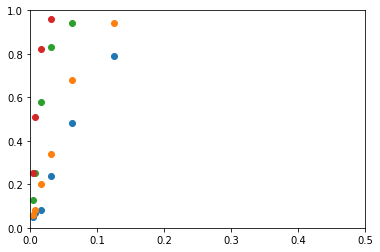

In [13]:
# (c)
def probminsv(size,n, threshold):
    A = mkRandMat(size)
    condnum = np.empty(0)
    for i in range(n):
        A = mkRandMat(size)
        minsv = np.array([np.linalg.norm(A,ord=-2,axis=(0,1))])
        condnum = np.concatenate((condnum, minsv))
    condnum.sort()
    
    th = threshold
    pbDict = {}
    index = 0
    for sv in condnum:
        if(th > 1): break
        if sv < th : 
            index += 1
            continue
        else:
            pbDict[th] = index / n
        th *= 2
        

    print(size, ":", pbDict)
    plt.xlim(0,.5)
    plt.ylim(0,1)
    
    plt.scatter(pbDict.keys(),pbDict.values())
probminsv(8,100, 1/256)
probminsv(16,100,1/256)
probminsv(32,100, 1/256)
probminsv(64,100, 1/256)

# m이 커짐에 따라 작은 singular value를 갖는 matrix의 비중이 커지고 있음을 확인하였다.



spectral radius :  0.649784986024178 2-norm :  1.4116874879121395
spectral radius :  0.5098251617448636 2-norm :  1.5050771559880527
spectral radius :  0.41138951258540646 2-norm :  1.5729734751354925
spectral radius :  0.3274958117059692 2-norm :  1.5980137194476358
spectral radius :  0.24544704784887766 2-norm :  1.6179163993008376
8 : {0.00390625: 0.75, 0.0078125: 0.84, 0.015625: 0.91, 0.03125: 0.96}
16 : {}
32 : {}
64 : {}


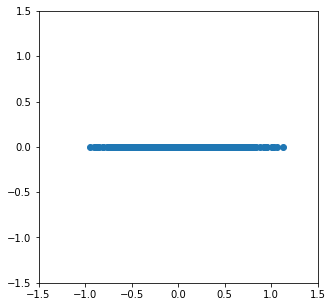

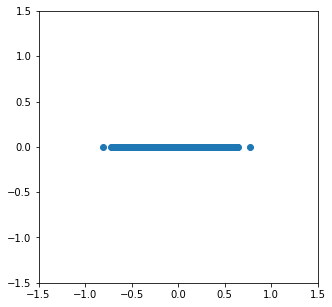

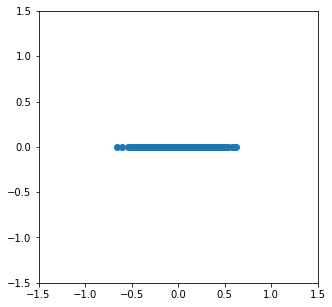

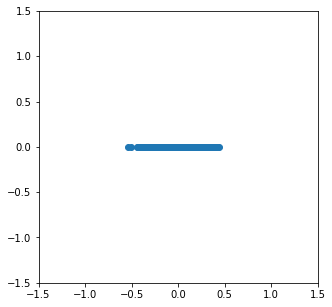

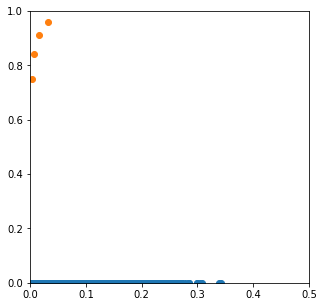

In [14]:
#(d)
# matrix가 upper triangule matrix라면 eigen value는 real number가 된다.
def mkRandMat(m):
    A = np.random.randn(m,m)/np.sqrt(m)
    A = np.triu(A)
    return A
plotEigenVal(8,100)
plotEigenVal(16,100)
plotEigenVal(32,100)
plotEigenVal(64,100)
plotEigenVal(128,100)
probminsv(8,100, 1/256)
probminsv(16,100,1/256)
probminsv(32,100, 1/256)
probminsv(64,100, 1/256)

#smallest singular value가 훨씬 작아진다. (그림에서는 너무 작은 숫자여서 에러가 발생하였다.)

# 4. 연습문제 4.6

In [82]:
m,n = 50,12
t = np.linspace(0,1,m)
A = np.fliplr(np.vander(t))
A = A[:,:12]
b = np.cos(4*t)
#(a) - normal equations
print("normal :\n", np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),b))

#(b)
Q,R = mgs(A)
print(Q.shape,R.shape)

print("mgs :\n", np.dot(np.dot(np.linalg.inv(R),Q.T),b))

#(c)
W,R = qrhouse(A)
Q = formQ(Q)
print(Q.shape,R.shape)
print("qrhouse :\n", np.dot(np.dot(np.linalg.inv(np.dot(R.T,R)),A.T),b))

#(d)
Q,R = np.linalg.qr(A)
print("pythonqr :\n", np.dot(np.dot(np.linalg.inv(R),Q.T),b))

#(e)
U,s,V = np.linalg.svd(A)
sig = np.zeros((50,12))
sig[np.diag_indices(12)] = s
print("SVD :\n",np.dot(np.dot(np.linalg.inv(np.dot(np.dot(np.dot(V.T,sig.T),sig),V)),A.T),b))

#(f)
# normal의 결과가 가장 unstable해 보이고, SVD의 결과도 다른 결과들과 비교해 차이가 많이 남을 확인하였다.

normal :
 [ 0.98923762  0.08971959 -8.43769491  1.17388068  9.30155964  0.44246298
 -5.48178161  0.17553008  0.91877688  0.69937311 -0.6758959   0.14210724]
(50, 12) (12, 12)
mgs :
 [ 1.00000000e+00 -4.58240109e-07 -7.99998009e+00 -3.33437818e-04
  1.06695290e+01 -1.42085087e-02 -5.64611093e+00 -7.68632228e-02
  1.69520470e+00  5.00761473e-03 -3.73871301e-01  8.79830113e-02]
(50, 50) (50, 12)
qrhouse :
 [ 0.99972107 -0.06132626 -7.43688734 -1.46922295 13.02512709 -2.80314445
 -3.53653349 -0.98584995  1.87348722  0.02993806 -0.39089773  0.09112785]
pythonqr :
 [ 1.00000000e+00 -4.22743422e-07 -7.99998124e+00 -3.18763336e-04
  1.06694308e+01 -1.38202905e-02 -5.64707562e+00 -7.53160351e-02
  1.69360698e+00  6.03209983e-03 -3.74241700e-01  8.80405755e-02]
SVD :
 [ 1.01918617 -0.2210519  -7.61005587 -0.03067297 10.5202706  -0.57175456
 -4.1536815  -1.71377802  2.86516002 -0.66751037 -0.10724311  0.04197785]
